In [7]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dict = {}
dict['death'] = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQF0soPGZPbLkCTbSobXWBhKyCgzr5fUUxL2RrrxgmAkmaqmY_k5fhAIVnejZvO10Rq-JcKDxbs_Mni/pub?gid=1113096403&single=true&output=csv',index_col='FIPS')
df_population = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTCFwquSBXtZ8U7AVSZi01npCzUndVJzkzVXX4iC0eZx1V9zIOmj9kNKGCy2hyNshsfznUgcyesJXDn/pub?gid=2133131838&single=true&output=csv')

# **Transpose** the dataframes and convert to **time series**
for key in dict:
  df = dict[key].transpose() # Transpose
  dict[key] = df.set_index(pd.to_datetime(df.index)) # convert to time series

df_death = dict['death'].diff()


# Most populous county
#The output result is the same as Wikipedia
#https://en.wikipedia.org/wiki/List_of_the_most_populous_counties_in_the_United_States

def nlargest_county( df_population, n =10):

  #Find the n counties with the largest population from the "Population.csv" data set, and return their FIPS codes and names
  a = df_population.nlargest(n, 'POPESTIMATE2019', keep='first')
  FIPS_code = a['FIPS'].values.tolist()
  name = a['COUNTY'].values.tolist()
  return FIPS_code, name


def get_name(FIPS = 6037):
  return df_population[df_population.FIPS == FIPS]['COUNTY'].values[0]

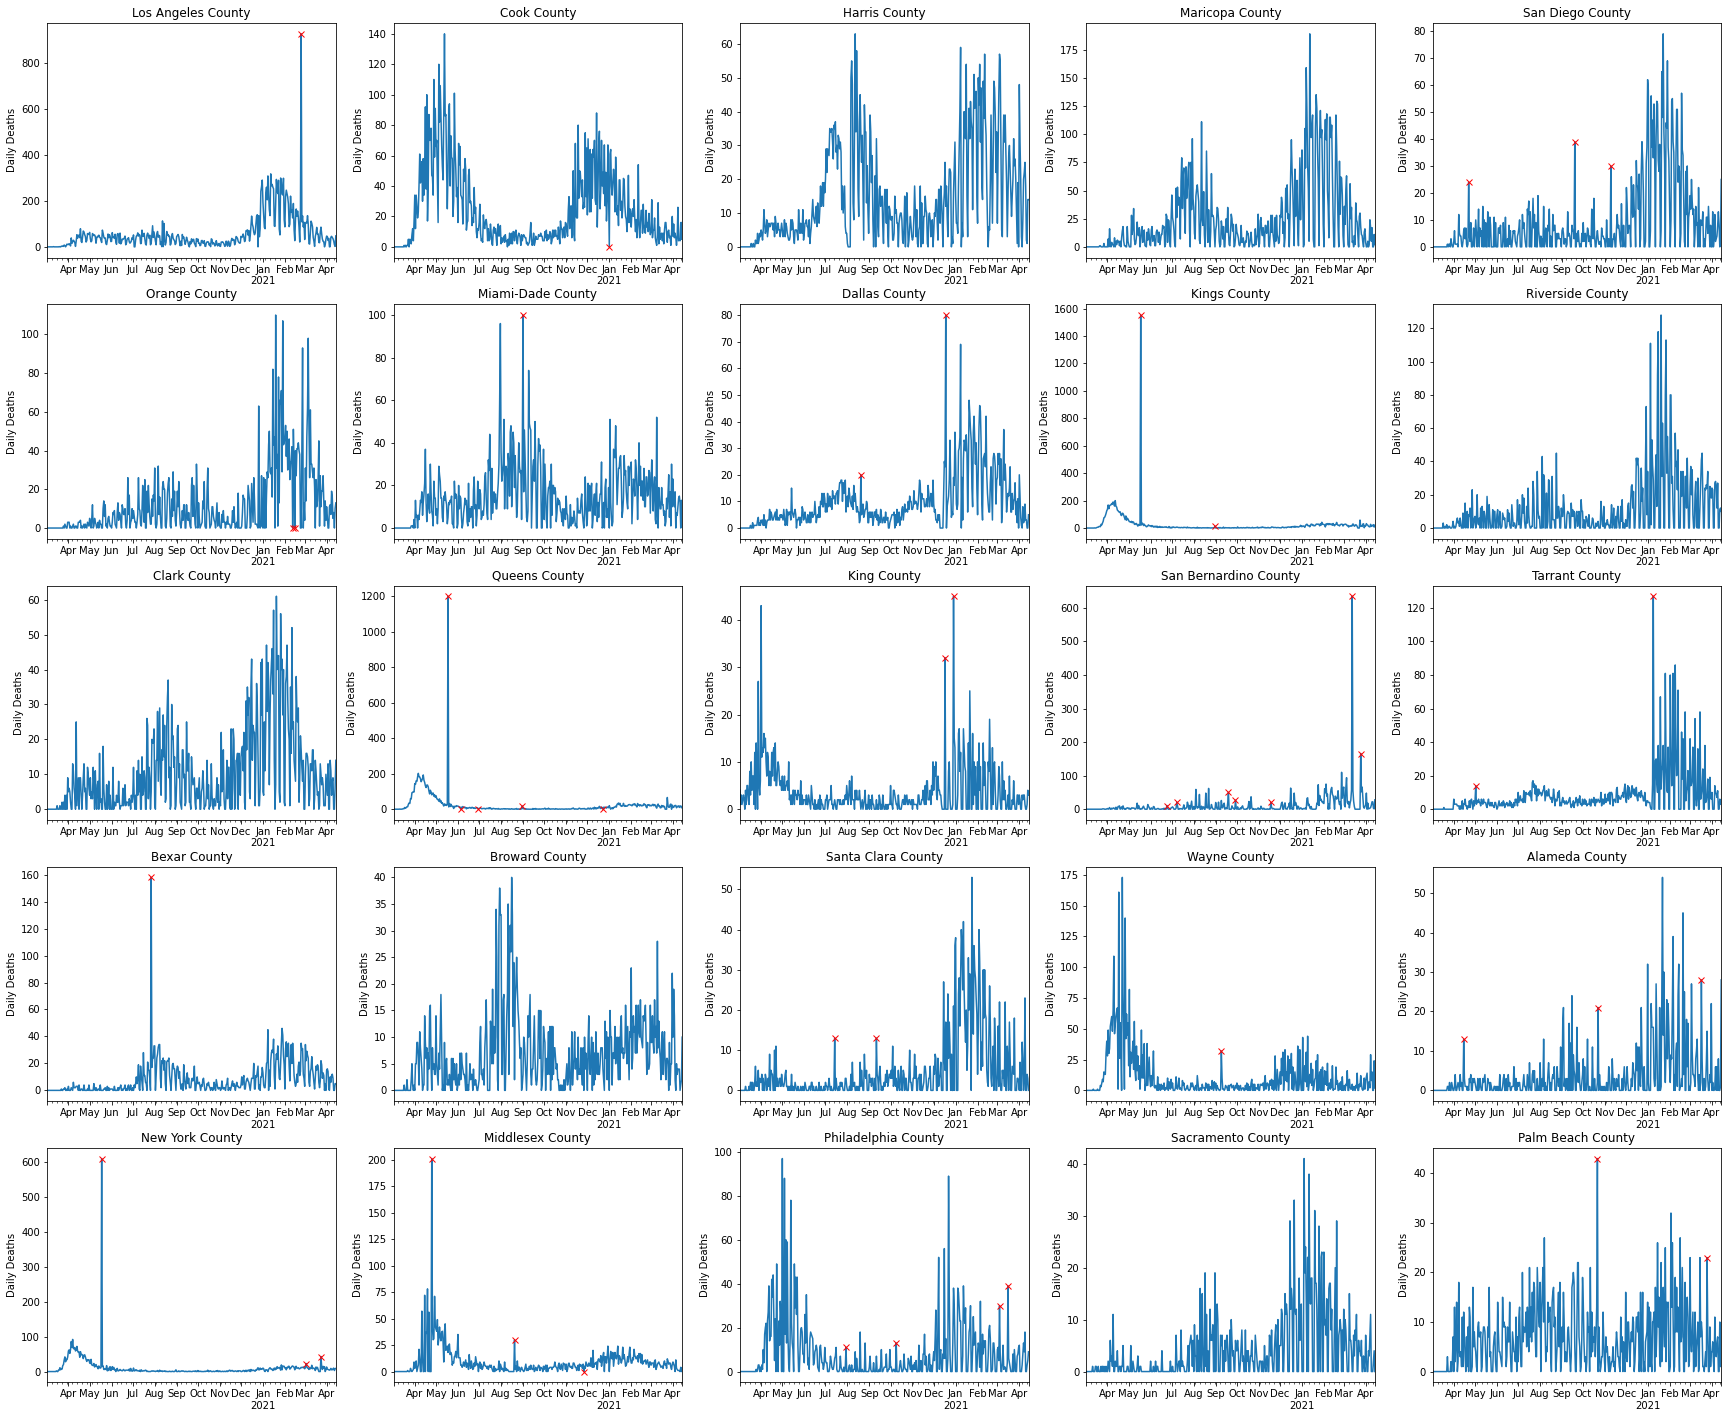

In [8]:
threshold = 3
window_size = 15

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(30, 25))
n=25
FIPS_code, name = nlargest_county(df_population,n)

for i in range(n):
  FIPS=FIPS_code[i]
  a = df_death[FIPS]
  a = a[40:] #  start from Mar 1,2021
  a[a < 0] = 0 # replace negative numbers in Pandas Data Frame by zero
  b = a.rolling(window_size, center=True).mean()
  d = a.rolling(window_size, center=True).std()
  outlier =  (( a-b>threshold*d  ) & (a>10)) |(  ( b-a>threshold*d/1.5  ) & (a<1) )
  row = i//5
  col = i%5

  a.plot( title=name[i],ylabel='Daily Deaths', ax=axes[row,col])
  try:
    (a[outlier]).plot(style='rx',  ax=axes[row,col])
  except:
    pass

